In [1]:
"""
!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas
!pip install geoplot
"""

'\n!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales\n!pip install contextily\n!pip install geopandas\n!pip install geoplot\n'

In [2]:
import pandas as pd 
import geopandas as gpd 
import nltk
nltk.download('punkt')
#!pip install contextily
import contextily as ctx
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import folium

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


In [3]:
df = pd.read_csv("df_with_rent_and_surface.csv", sep = ',')

In [4]:
"""
On enlève les colonnes qui ne nous intéresse pas. 
"""
df.drop(columns=["short_desc", "infos", "services", "contact", "mail", "phone", "openinghours",
                "interneturl", "appointmenturl", "virtualvisiturl", "bookingurl",
                 "troubleshootingurl", "photo"
                ],inplace=True)

In [5]:
"""
On récupère les donnés géographiques stockées dans la colonne geocalisation 
qui présente d'abord la latitude puis la longitude. 
"""

Longitude = []
Latitude = []
for j in range(0,df.shape[0]):
    geocalisation = df["geocalisation"][j]
    geocalisation = geocalisation.replace(',', ' ')
    word =  nltk.word_tokenize(geocalisation, language='french')
    Latitude.append(float(word[0]))
    Longitude.append(float(word[1]))
df['Longitude'] = Longitude
df['Latitude'] = Latitude

In [6]:
"""
On transforme notre dataframe pandas en geopandas avec pour geometry la latitude et 
la longitude.
"""
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

gdf

,id,title,zone,address,geocalisation,regions,Loyer,Max Loyer,Min Loyer,Mean Loyer,Surface,Max Surface,Min Surface,Mean Surface,Longitude,Latitude,geometry
0,205,Résidence Vauban,YVELINES,1 boulevard d’Alembert 78280 Guyancourt,"48.7796516418,2.0441513062",Île-de-France,"[333.0, 537.0]",537.00,333.00,435.000000,[],NaN,NaN,NaN,2.044151,48.779652,POINT (2.04415 48.77965)
1,207,Résidence Le Square de l'Echiquier,VAL D'OISE,9 square de l'échiquier 95800 Cergy-Pontoise,"49.0482978821,2.02688694",Île-de-France,[334.0],334.00,334.00,334.000000,[],NaN,NaN,NaN,2.026887,49.048298,POINT (2.02689 49.04830)
2,214,Résidence Les Bas Longchamps,HAUTS DE SEINE,2 rue Abraham Lincoln 92220 Bagneux,"48.7906913757,2.3169708252",Île-de-France,"[332.0, 359.0]",359.00,332.00,345.500000,[28.0],28.0,28.0,28.000000,2.316971,48.790691,POINT (2.31697 48.79069)
3,225,Résidence de l’Ile,ESSONNE,14 rue du Docteur Collé - bâtiment 227 du camp...,"48.698802948,2.1578958035",Île-de-France,[362.0],362.00,362.00,362.000000,[18.0],18.0,18.0,18.000000,2.157896,48.698803,POINT (2.15790 48.69880)
4,228,Résidence La Pacaterie,ESSONNE,Bâtiment 499 - rue de la Pacaterie 91400 Orsay,"48.7015419006,2.1846776009",Île-de-France,[154.0],154.00,154.00,154.000000,[],NaN,NaN,NaN,2.184678,48.701542,POINT (2.18468 48.70154)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,349,Cité Grémillon (secteur d'Hérouville-Saint-Clair),Herouville Saint Clair,BP 54 - Avenue de la Grande Cavée 14202 Hérouv...,"49.2032051086,-0.3392136097",Normandie,"[249.85, 312.9, 388.6, 467.4, 525.0, 556.14]",556.14,249.85,416.648333,"[9.0, 18.0, 30.0, 49.0, 65.0, 69.0]",69.0,9.0,40.000000,-0.339214,49.203205,POINT (-0.33921 49.20321)
784,331,Résidence Antide Janvier,Besançon - Centre ville,6 rue Antide Janvier 25000 Besançon,"47.2365074158,6.0153431892",Bourgogne-Franche-Comté,"[347.0, 502.0, 523.0]",523.00,347.00,457.333333,"[19.0, 35.3]",35.3,19.0,27.150000,6.015343,47.236507,POINT (6.01534 47.23651)
785,335,Résidence Jean Paul Sartre,Belfort,Rue Gaston Deferre 90000 Belfort,"47.6389884949,6.8537139893",Bourgogne-Franche-Comté,"[280.0, 311.0, 361.0, 405.0, 416.0, 466.0, 586.0]",586.00,280.00,403.571429,"[18.0, 36.0, 51.5]",51.5,18.0,35.166667,6.853714,47.638988,POINT (6.85371 47.63899)
786,416,Maret,DIJON CENTRE,3 rue du Docteur Maret 21000 Dijon,"47.3224983215,5.0353322029",Bourgogne-Franche-Comté,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.035332,47.322498,POINT (5.03533 47.32250)


In [7]:
"""
On récupère que les résidences de l'île de France. 
"""
idf_gdf = gdf[gdf["regions"] == "Île-de-France"]


In [8]:
"""
On récupère un fond de carte de la France.
"""
data = gpd.read_file("https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/france.geojson")


In [9]:
"""
On ne garde que les régions de l'île de France. 
"""
idf = data[(data["code"] == "75") | (data["code"] == "77") |
    (data["code"] == "91") | (data["code"] == "92")|
(data["code"] == "93") | (data["code"] == "94") |
(data["code"] == "95") | (data["code"] == "78")]

<AxesSubplot: >

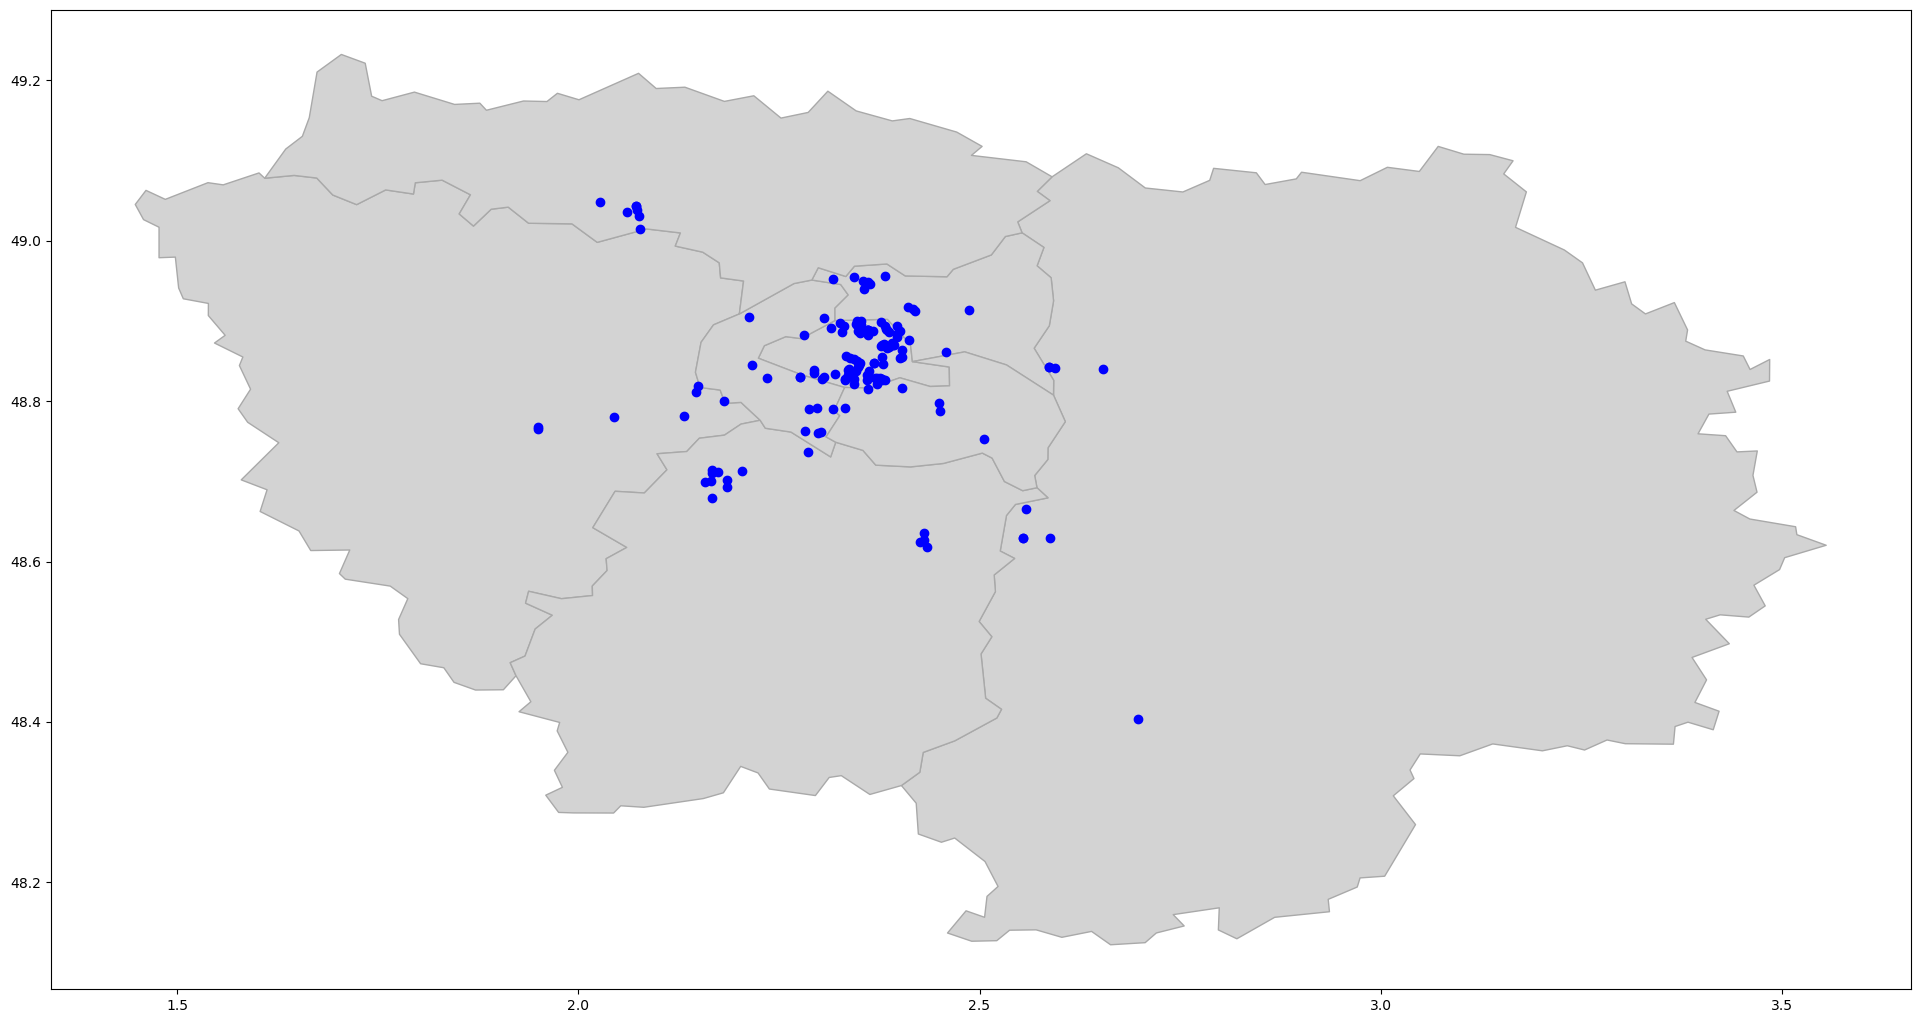

In [10]:
"""
On affiche les résidences sur la carte. 
"""

fig, ax = plt.subplots(figsize=(24, 18))

idf.plot(ax =ax, edgecolor='darkgrey', facecolor='lightgrey')
idf_gdf.plot(ax = ax, color='blue')

In [45]:
Essonne_gdf = idf_gdf.loc[idf_gdf["zone"] == "ESSONNE"]
Essonne_gdf = Essonne_gdf.reset_index()
Essonne_gdf

,index,id,title,zone,address,geocalisation,regions,Loyer,Max Loyer,Min Loyer,Mean Loyer,Surface,Max Surface,Min Surface,Mean Surface,Longitude,Latitude,geometry
0,3,225,Résidence de l’Ile,ESSONNE,14 rue du Docteur Collé - bâtiment 227 du camp...,"48.698802948,2.1578958035",Île-de-France,[362.0],362.0,362.0,362.0,[18.0],18.0,18.0,18.0,2.157896,48.698803,POINT (2.15790 48.69880)
1,4,228,Résidence La Pacaterie,ESSONNE,Bâtiment 499 - rue de la Pacaterie 91400 Orsay,"48.7015419006,2.1846776009",Île-de-France,[154.0],154.0,154.0,154.0,[],NaN,NaN,NaN,2.184678,48.701542,POINT (2.18468 48.70154)
2,7,1263,Résidence Jean d'Ormesson,ESSONNE,20 cours Pierre Vasseur 91120 Palaiseau,"48.713,2.20353",Île-de-France,"[313.0, 456.0]",456.0,313.0,384.5,[],NaN,NaN,NaN,2.203530,48.713000,POINT (2.20353 48.71300)
3,371,226,Résidence Emilie du Châtelet,ESSONNE,13 rue Joliot Curie 91192 Gif-sur-Yvette,"48.7097740173,2.1665172577",Île-de-France,[351.0],351.0,351.0,351.0,[18.0],18.0,18.0,18.0,2.166517,48.709774,POINT (2.16652 48.70977)
4,372,229,Résidence Les jardins de Fleming,ESSONNE,21 rue André Maginot 91400 Orsay,"48.6935462952,2.1846373081",Île-de-France,[],NaN,NaN,NaN,[],NaN,NaN,NaN,2.184637,48.693546,POINT (2.18464 48.69355)
5,603,222,Résidence Les Aunettes,ESSONNE,1 impasse de Prédecelle 91000 Evry,"48.617641449,2.4339873791",Île-de-France,[260.0],260.0,260.0,260.0,[],NaN,NaN,NaN,2.433987,48.617641,POINT (2.43399 48.61764)
6,771,220,Résidence Flora Tristan,ESSONNE,1 rue Jules Vallès 91000 Evry,"48.635974884,2.430277586",Île-de-France,"[242.0, 468.0]",468.0,242.0,355.0,[],NaN,NaN,NaN,2.430278,48.635975,POINT (2.43028 48.63597)
7,772,221,Résidence Le Dragueur,ESSONNE,4 allée Jean-Rostand 91000 Evry,"48.6271018982,2.4313938618",Île-de-France,"[349.0, 451.0]",451.0,349.0,400.0,[],NaN,NaN,NaN,2.431394,48.627102,POINT (2.43139 48.62710)
8,773,223,Résidence Marguerite Yourcenar,ESSONNE,15 rue André Lalande 91000 EVRY,"48.6238670349,2.4252643585",Île-de-France,"[349.0, 451.0]",451.0,349.0,400.0,[],NaN,NaN,NaN,2.425264,48.623867,POINT (2.42526 48.62387)
9,774,227,Résidence Le Bosquet,ESSONNE,15 rue le Bosquet 91940 Les Ulis,"48.6792793274,2.1664700508",Île-de-France,[163.0],163.0,163.0,163.0,[],NaN,NaN,NaN,2.166470,48.679279,POINT (2.16647 48.67928)


In [42]:
Essonne_map = data[(data["code"] == "91")]

/opt/mamba/lib/python3.10/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


Text(0.5, 1.0, 'Residence')

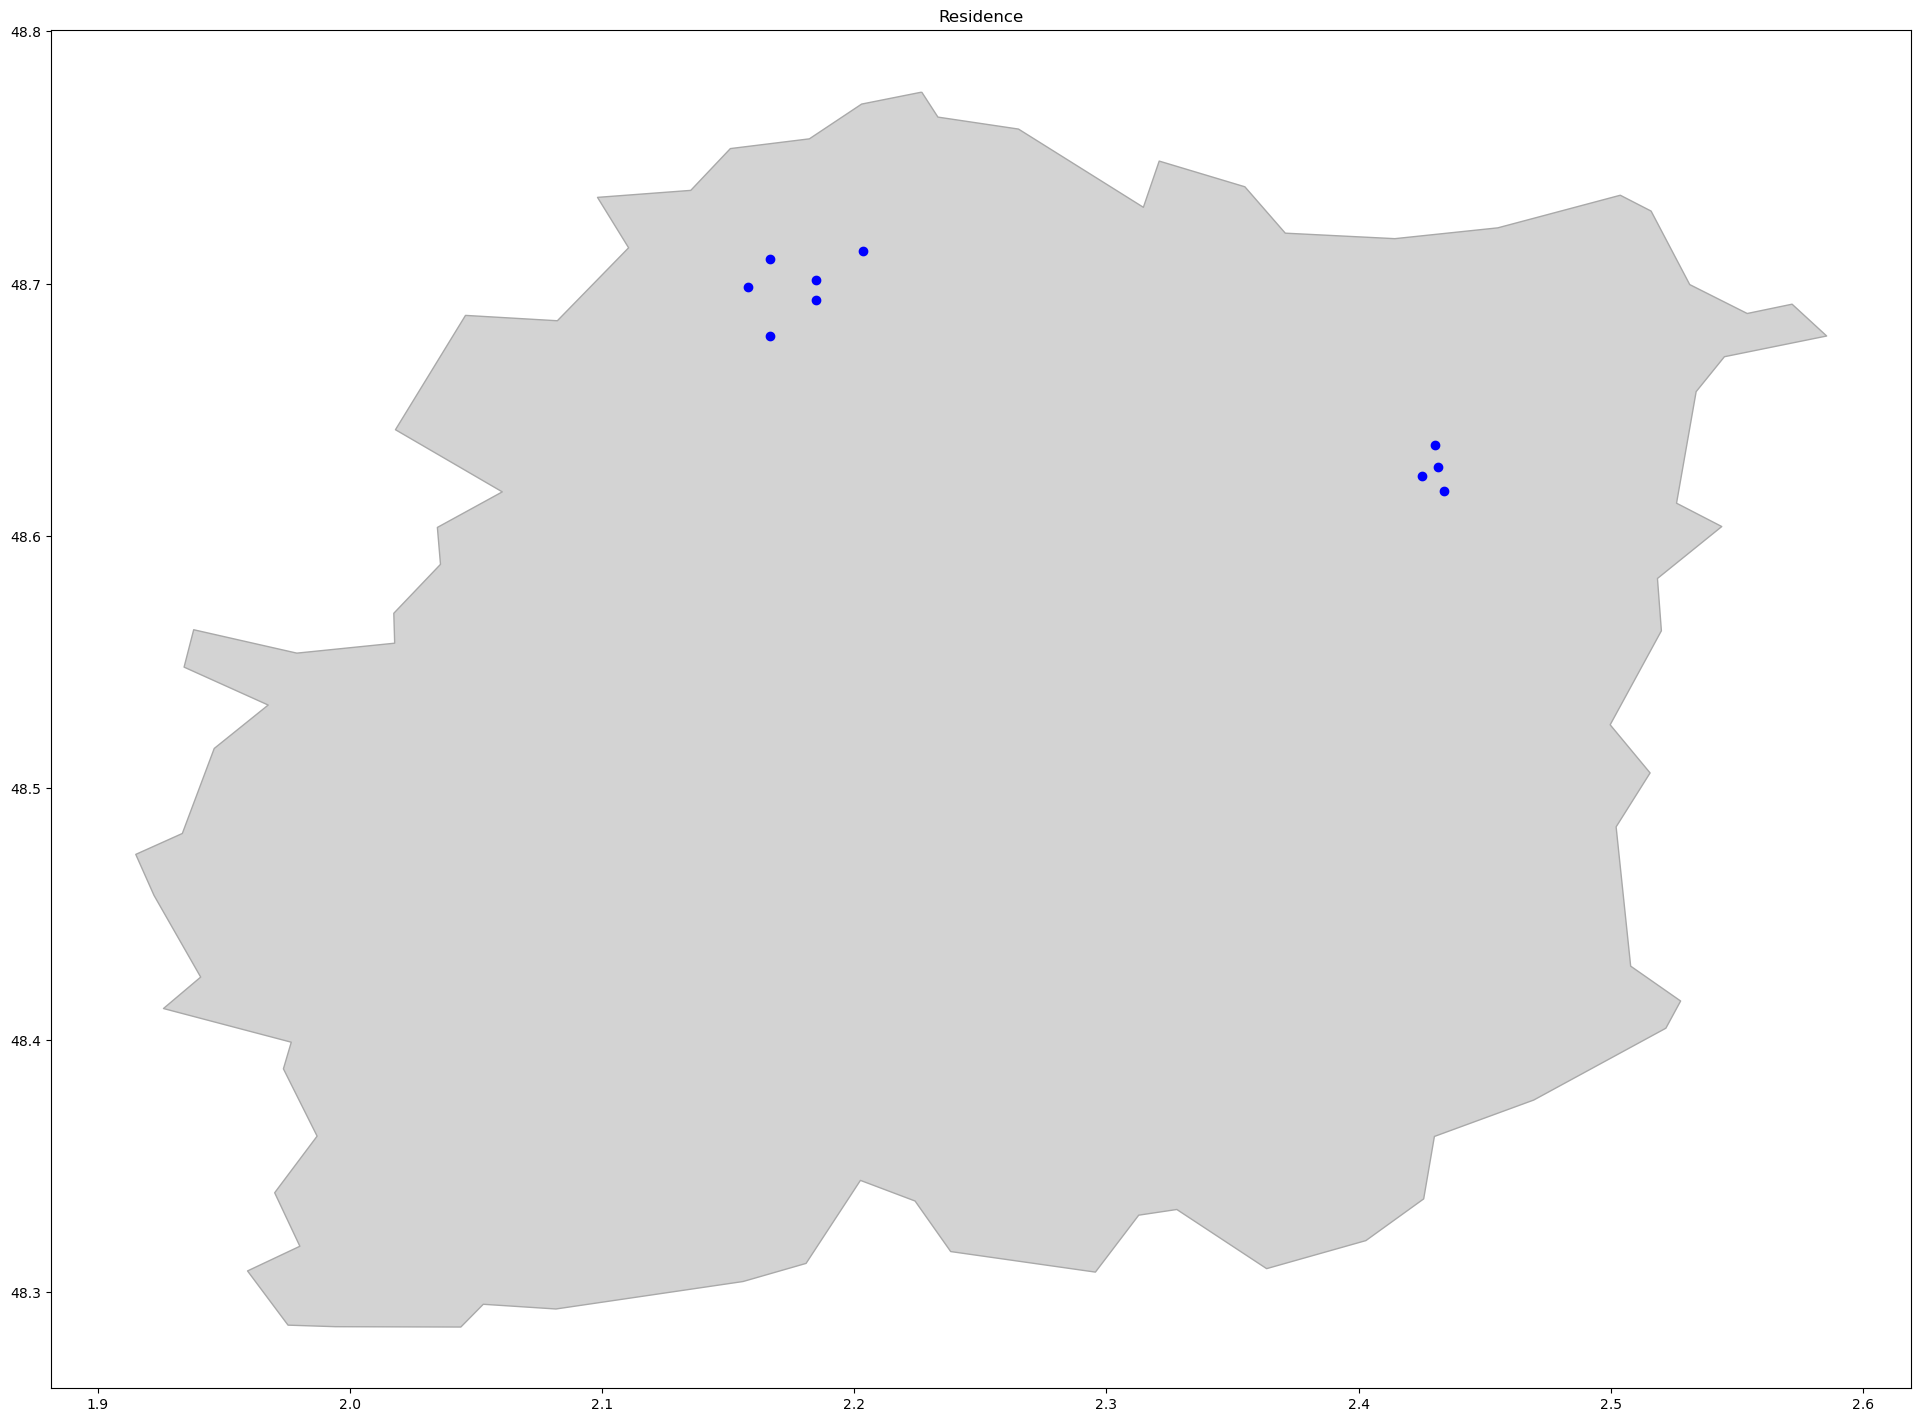

In [58]:
fig, ax = plt.subplots(figsize=(24, 18))

Essonne_map.plot(ax =ax, edgecolor='darkgrey', facecolor='lightgrey')
Essonne_gdf.plot(ax = ax, column = "title", color='blue')
plt.title("Residence")


In [66]:
map = folium.Map(location=[48.7144587, 2.2453842], tiles="OpenStreetMap", zoom_start=11)
map

In [68]:
# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in Essonne_gdf.geometry] 

# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in geo_df_list:
    # Place the markers with the popup labels and data
    map.add_child(
        folium.Marker(
            location=coordinates,
            popup=
                 "Name: " + str(Essonne_gdf.title[i]) + "<br>"
                + "Moyenne Loyer: " + str(Essonne_gdf["Mean Loyer"][i]) + "<br>"
                + "Moyenne surface: " + str(Essonne_gdf["Mean Surface"][i]) + "<br>"
                + "Address: " + str(Essonne_gdf.address[i]) + "<br>"
                + "Coordinates: " + str(geo_df_list[i])
            ,
        
            icon=folium.Icon(color="blue"),
        )
    )
    i = i + 1

In [69]:
map